In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time

In [61]:
driver = webdriver.Chrome(executable_path = "chromedriver.exe")

In [62]:
driver.get("https://www.thaipbs.or.th/news/categories/politics/archive?page=1&section=politics") #เปิดเว็ป url นั้นๆ

'<html lang="th" class="show--consent"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width"><link rel="icon" href="/favicon.ico"><script src="https://partner.googleadservices.com/gampad/cookie.js?domain=www.thaipbs.or.th&amp;callback=_gfp_s_&amp;client=ca-pub-9491275815290972"></script><script async="" src="https://mnjura.com/assets/recs/js/_brc.js"></script><script async="" src="https://mnjura.com/btm/bti.js?sid=418438fd-bf5d-41e0-af5d-5ca99c2023c2&amp;bid=0f1af428-89be-4fea-8170-c9c0e974209d"></script><script async="" src="https://www.clarity.ms/eus2-sc/s/0.7.6/clarity.js"></script><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202303280101/show_ads_impl_fy2021.js?bust=31073508" id="google_shimpl"></script><script async="" src="https://mnjura.com/assets/analytics/js/blish-analytic.js"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-5D44Q9Q3LJ&amp;l=dataLayer&amp;cx=c"></script
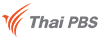
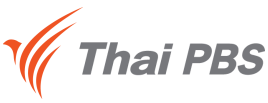
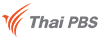
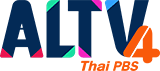
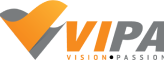

In [15]:
driver.page_source #โค้ด Html

In [19]:
list_title = driver.find_elements_by_class_name("ContentInformationLayoutAstyle__Title-sc-1ut12ee-2 eLgGKX content-information-title") #element เติม s เพื่อดึงหลากหลาย

In [69]:
test_title = driver.find_elements_by_css_selector("a[class = 'ContentInformationLayoutAstyle__Anchor-sc-1ut12ee-14 fokZKG']")

In [46]:
list_clean_title = [i.text for i in test_title]

In [47]:
list_clean_title

['"โรม" นำทีมว่าที่ผู้สมัคร ส.ส.นครศรีฯ ทั้ง 10 เขต มั่นใจปักธงส้มได้แน่',
 '"พิธา" นำทีมผู้สมัคร ส.ส. 33 เขต กทม.ขึ้นรถปราศรัยหลังจับเบอร์',
 '"บิ๊กตู่" เปิดใจไม่ลงปาร์ตี้ลิสต์เหตุงานเยอะ อยู่ไม่ถึง 2 ปีมี "พีระพันธุ์"ตัวแทน',
 'กกต.เตือน ส.ส. ได้เบอร์ "อย่าแห่หาเสียง" 7 เม.ย.ลุ้นศาลปมแบ่งเขต',
 '“วราวุธ” มั่นใจในผลงาน อ้อนคนสุพรรณฯ ขอ 8 แสนเสียง',
 '"ขี่สกู๊ตเตอร์-สวมชุดนักรบโบราณ" สีสันรับสมัครเลือกตั้ง2566',
 '"ประยุทธ์" ไม่กังวลเลือกตั้ง 66 พร้อมสู้ "ประวิตร" แบบการเมือง',
 '“ตรัง-ปัตตานี” รับสมัคร ส.ส.วันแรกคึกคัก “เด่น-ทวี” มาให้กำลังใจ',
 '"เสรีพิศุทธ์" ชูปราบโกง ดึงคนลงคะแนน "เสรีรวมไทย"',
 '"ไทยสร้างไทย" ขอเป็นทางรอดให้ประเทศ-ยุติการเมือง 2 ขั้ว',
 'ภท.ชูจุดแข็งนโยบายทำได้จริง พร้อมส่งผู้สมัครสู้ศึกเลือกตั้งสนาม กทม.',
 '"พิธา" มั่นใจ 3 จุดแข็งช่วยคว้า 33 ที่นั่ง ส.ส.กทม.',
 '"หมอวรงค์" ยันสู้เต็มที่ชิงเก้าอี้ ส.ส.กทม.ชูพลังงานสะอาด-ปราบโกง',
 '“นครศรีฯ” แห่กราบพระบรมธาตุ แกนนำพรรคให้กำลังใจคึกคัก',
 '"ประวิตร" บอก ยังไม่มีเบอร์ในใจแต่ขอให้ได้เลขตัวเดียว ยันไม่ร่วมดีเบต',
 '“

In [65]:
driver.back()

In [67]:
test_title[2]

<selenium.webdriver.remote.webelement.WebElement (session="cc6286be66fcaf1701ee12dd05f50f42", element="74ff85d5-a7d7-4f11-997f-86670229543f")>

In [73]:
sub_page = driver.find_elements_by_css_selector('a[class = "ContentInformationLayoutAstyle__Anchor-sc-1ut12ee-14 fokZKG"][href]')

In [74]:
links = [elem.get_attribute('href') for elem in sub_page]

In [202]:
driver.quit()

In [2]:
def get_url_subpage(url, number_page):
    url_list = []
    title_list = []
    driver = webdriver.Chrome(executable_path = "chromedriver.exe")
    driver.get(url)
    for i in range(number_page):
        sub_page_url = driver.find_elements_by_css_selector('a[class = "ContentInformationLayoutAstyle__Anchor-sc-1ut12ee-14 fokZKG"][href]')
        sub_page_title = driver.find_elements_by_css_selector("a[class = 'ContentInformationLayoutAstyle__Anchor-sc-1ut12ee-14 fokZKG'][title]")
        [url_list.append(elem.get_attribute('href')) for elem in sub_page_url]
        [title_list.append(title.get_attribute('title')) for title in sub_page_title]
        page_next_button = driver.find_element_by_css_selector("svg[class = 'svg-inline--fa fa-chevron-right fa-w-8 ']")
        page_next_button.click()
        time.sleep(2)
    df = pd.DataFrame(zip(url_list, title_list), columns = ["link","title"])
    driver.quit()
    return df

In [148]:
url = "https://www.thaipbs.or.th/news/categories/politics/archive?page=1&section=politics"
df = get_url_subpage(url, 10)

In [158]:
len(df["title"].unique())

240

In [159]:
df.head()

,link,title
0,https://www.thaipbs.or.th/news/content/326253,วันแรก รับสมัคร ส.ส.แบ่งเขต กทม.เป็นไปอย่างเรี...
1,https://www.thaipbs.or.th/news/content/326248,"""โรม"" นำทีมว่าที่ผู้สมัคร ส.ส.นครศรีฯ ทั้ง 10 ..."
2,https://www.thaipbs.or.th/news/content/326244,"""พิธา"" นำทีมผู้สมัคร ส.ส. 33 เขต กทม.ขึ้นรถปรา..."
3,https://www.thaipbs.or.th/news/content/326247,"""บิ๊กตู่"" เปิดใจไม่ลงปาร์ตี้ลิสต์เหตุงานเยอะ อ..."
4,https://www.thaipbs.or.th/news/content/326245,"กกต.เตือน ส.ส. ได้เบอร์ ""อย่าแห่หาเสียง"" 7 เม...."


In [236]:
driver.quit()

In [3]:
def create_news_df(df):
    title_list = []
    context_list = []
    label_list = []
    links_list = df["link"].tolist()
    driver = webdriver.Chrome(executable_path = "chromedriver.exe")
    for url in links_list:
        try :
            driver.get(url)
            time.sleep(2)
            titles = driver.find_element_by_css_selector("h1[class = 'NewsHeaderstyle__TitleText-sc-s5ub5p-3 eBxWnb']")
            contexts = driver.find_element_by_css_selector("strong[class = 'TemplateContentstyle__NewsAbstract-sc-1yh83mt-19 hfyxJF']")
            labels = driver.find_element_by_css_selector("a[class= 'NewsHeaderstyle__Badge-sc-s5ub5p-7 fswRBR'][title]")
            title_list.append(titles.text)
            context_list.append(contexts.text)
            label_list.append(labels.get_attribute('title'))
        except :
            pass
    df_text = pd.DataFrame(zip(title_list, context_list, label_list), columns = ["title","context","label"])
    driver.quit()
    return df_text

In [208]:
title_list = []
driver = webdriver.Chrome(executable_path = "chromedriver.exe")
driver.get("https://www.thaipbs.or.th/news/content/326253")
titles = driver.find_element_by_css_selector("h1[class = 'NewsHeaderstyle__TitleText-sc-s5ub5p-3 eBxWnb']")
title_list.append(titles.text)

In [240]:
df_politics_news = create_news_df(df)

In [241]:
df_politics_news

,title,context,label
0,วันแรก รับสมัคร ส.ส.แบ่งเขต กทม.เป็นไปอย่างเรี...,วันแรก รับสมัครเลือกตั้ง ส.ส.แบ่งเขตวันแรกคึกค...,การเมือง
1,"""โรม"" นำทีมว่าที่ผู้สมัคร ส.ส.นครศรีฯ ทั้ง 10 ...",ก้าวไกล ดาวกระจายสมัคร ส.ส.ทั่วประเทศ บรรยากาศ...,การเมือง
2,"""พิธา"" นำทีมผู้สมัคร ส.ส. 33 เขต กทม.ขึ้นรถปรา...",ส.ส.ก้าวไกล ขึ้นรถปราศรัยหลังจับเบอร์ผู้สมัคร ...,การเมือง
3,"""บิ๊กตู่"" เปิดใจไม่ลงปาร์ตี้ลิสต์เหตุงานเยอะ อ...",พล.อ.ประยุทธ์ ย้ำไม่จับมือทุกพรรค ไม่มีเงื่อนไ...,การเมือง
4,"กกต.เตือน ส.ส. ได้เบอร์ ""อย่าแห่หาเสียง"" 7 เม....",กกต.พอใจรับสมัครส.ส.วันแรก รอตรวจคุณสมบัติอีก ...,การเมือง
...,...,...,...
222,ว่าที่ผู้สมัครชาติไทยพัฒนา “อยุธยา” โอดป้ายหาเ...,ว่าที่ผู้สมัครพรรคชาติไทยพัฒนา พระนครศรีอยุธยา...,การเมือง
223,วันหยุดคึกคัก! พรรคการเมืองเดินหน้าหาเสียงหลาย...,เพื่อไทยลุยหาเสียงพิจิตรขอแลนด์สไลด์ ทั้ง 3 เข...,การเมือง
224,"""ตะวัน-แบม"" เลิกอดอาหาร ประกาศรับการรักษาเพื่อ...","""ตะวัน-แบม"" แจ้งเลิกอดอาหารและจะรับการรักษาเพื...",การเมือง
225,นายกฯ ตรวจราชการ จ.สงขลา ผู้สมัคร รทสช.ต้อนรับ,พล.อ.ประยุทธ์ จันทร์โอชา นายกรัฐมนตรี เดินทางต...,การเมือง


In [235]:
len(df_politics_news[1])

227

In [217]:
context_list

['วันแรก รับสมัครเลือกตั้ง ส.ส.แบ่งเขตวันแรกคึกคัก เป็นไปด้วยความเรียบร้อย กทม.พร้อมรับสมัครแบบบัญชีรายชื่อ 4 เม.ย.นี้',
 'ก้าวไกล ดาวกระจายสมัคร ส.ส.ทั่วประเทศ บรรยากาศสุดคึกคัก "รังสิมันต์ โรม" นำทีมว่าที่ผู้สมัคร ส.ส.นครศรีฯ ทั้ง 10 เขต มั่นใจรอบนี้ปักธงส้มได้แน่ ขอกาก้าวไกลเลือกคนใหม่ไปเปลี่ยนประเทศ ให้การเมืองดี ปากท้องดี มีอนาคต']

In [194]:
title_list

[]

In [184]:
df_text

,title,context,date,label


In [143]:
df = pd.DataFrame(zip(url_list, title_list), columns = ["link","title"])

In [144]:
df.head().shape

(5, 2)

In [139]:
page_button = driver.find_element_by_xpath("/html/body/div[1]/div[2]/section/div[2]/div/a")
page_button.click()

In [250]:
driver.quit

<bound method WebDriver.quit of <selenium.webdriver.chrome.webdriver.WebDriver (session="5ccac78d8ab307777c84f1bdfaaba3ec")>>

Politics_news

In [90]:
politics_news_df, url = scrap_news("https://www.thaipbs.or.th/news/categories/politics/archive?page=1&section=politics", 5)

In [91]:
url

['https://www.thaipbs.or.th/news/categories/politics/archive?page=2&section=politics',
 'https://www.thaipbs.or.th/news/categories/politics/archive?page=2&section=politics',
 'https://www.thaipbs.or.th/news/categories/politics/archive?page=3&section=politics',
 'https://www.thaipbs.or.th/news/categories/politics/archive?page=4&section=politics']

In [80]:
len(politics_news_df["title"].unique())

24

In [243]:
df_politics_news.to_csv("politics_news.csv",encoding="utf-8-sig")

All News URL

In [12]:
url_politics = "https://www.thaipbs.or.th/news/categories/politics/archive?section=politics&page=1"
url_crime = "https://www.thaipbs.or.th/news/categories/crime/archive?section=crime&page=1"
url_sport = "https://www.thaipbs.or.th/news/categories/sport/archive?section=sport&page=1"
url_economy = "https://www.thaipbs.or.th/news/categories/economy/archive?page=1"
url_tech = "https://www.thaipbs.or.th/news/categories/tech/archive?page=1&section=tech"

Politics news

In [5]:
df_url_politics = get_url_subpage(url_politics, 10)
df_politics = create_news_df(df_url_politics)

In [6]:
df_politics.head()

,title,context,label
0,วันแรก รับสมัคร ส.ส.แบ่งเขต กทม.เป็นไปอย่างเรี...,วันแรก รับสมัครเลือกตั้ง ส.ส.แบ่งเขตวันแรกคึกค...,การเมือง
1,"""โรม"" นำทีมว่าที่ผู้สมัคร ส.ส.นครศรีฯ ทั้ง 10 ...",ก้าวไกล ดาวกระจายสมัคร ส.ส.ทั่วประเทศ บรรยากาศ...,การเมือง
2,"""พิธา"" นำทีมผู้สมัคร ส.ส. 33 เขต กทม.ขึ้นรถปรา...",ส.ส.ก้าวไกล ขึ้นรถปราศรัยหลังจับเบอร์ผู้สมัคร ...,การเมือง
3,"""บิ๊กตู่"" เปิดใจไม่ลงปาร์ตี้ลิสต์เหตุงานเยอะ อ...",พล.อ.ประยุทธ์ ย้ำไม่จับมือทุกพรรค ไม่มีเงื่อนไ...,การเมือง
4,"กกต.เตือน ส.ส. ได้เบอร์ ""อย่าแห่หาเสียง"" 7 เม....",กกต.พอใจรับสมัครส.ส.วันแรก รอตรวจคุณสมบัติอีก ...,การเมือง


In [7]:
df_politics.shape

(227, 3)

Crime news

In [8]:
df_url_crime = get_url_subpage(url_crime, 10)
df_crime = create_news_df(df_url_crime)

In [9]:
df_crime.head()

,title,context,label
0,"ศาลสั่งปิดเว็บ ""9near"" อ้างมีข้อมูลคนไทย 55 ล้...",ศาลสั่งปิดเว็บไซต์ 9near.org หลังระบุมีข้อมูลค...,อาชญากรรม
1,ผบ.ตร.สั่งประสานตำรวจสากลขอหมายแดง จับแก๊งอุ้ม...,ผบ.ตร.สั่งการประสานตำรวจสากลขอหมายแดง ติดตามกล...,อาชญากรรม
2,"""รู้ตัว 9near"" ฝีมือแฮกเกอร์ไทยขู่ข้อมูลหลุด 5...","""ชัยวุฒิ"" ระบุรู้ตัวผู้ใช้บัญชี “9near” ที่อ้า...",อาชญากรรม
3,พบศพชายในวิทยาลัยชื่อดังพิษณุโลก ร่างกายมีแผลถ...,พบศพชายไม่ทราบชื่อ ผมยาว เจาะหู จัดฟัน มีรอยสั...,อาชญากรรม
4,"""อนันต์ชัย"" ฟ้อง ""สันธนะ"" หมิ่นประมาท ยัน ""สวน...","""ทนายอนันต์ชัย"" ขึ้นศาลฟ้อง ""สันธนะ"" หมิ่นประม...",อาชญากรรม


In [10]:
df_crime.shape

(236, 3)

Sport news

In [13]:
df_url_sport = get_url_subpage(url_sport, 10)
df_sport = create_news_df(df_url_sport)

In [14]:
df_sport

,title,context,label
0,"""ฮุน เซน"" สั่งไม่เก็บค่าลิขสิทธิ์ถ่ายทอดสด ""ซี...",สมเด็จ ฮุน เซน ประกาศจะให้ลิขสิทธิ์ถ่ายทอดสดกา...,กีฬา
1,อินโดนีเซีย เสียสิทธิจัดบอลโลกยู-20,อินโดนีเซีย เสียสิทธิ์การเป็นเจ้าภาพจัดฟุตบอลโ...,กีฬา
2,ทีมชาติไทย 0-2 ยูเออี ปิดฉากฟุตบอลอุ่นเครื่องฟ...,ทีมชาติไทย พ่ายเจ้าภาพยูเออี 0-2 ประตู ปิดฉากก...,กีฬา
3,สกอตแลนด์ เอาชนะ สเปน 2-0 บอลคัดเลือกยูโร 2024,"""แม็คโทมิเนย์"" ระเบิดฟอร์มร่างทอง เหมา 2 ประตู...",กีฬา
4,"ฝุ่นพิษสูง ""เชียงรายยูไนเต็ด"" ส่งหนังสือเลื่อน...","""สโมสร ลีโอ เชียงราย ยูไนเต็ด"" ทำหนังสือถึงไทย...",กีฬา
...,...,...,...
235,"คู่พี่น้อง ""เอี่ยมสอาด"" คว้าแชมป์หญิงคู่ที่เยอ...","นักแบดมินตัน 2 พี่น้อง ""เอี่ยมสอาด"" โชว์ฟอร์มเ...",กีฬา
236,"กาตาร์เดินหน้าจัด ""บอลโลก"" เมินคำประท้วงด้านสิ...","เหลือเวลาอีก 2 สัปดาห์กับการแข่งขัน ""บอลโลก 20...",กีฬา
237,"""เทนนิส-พาณิภัค"" พร้อมลุยศึกเทควันโดโลก","""เทนนิส-พาณิภัค"" พร้อมลุยศึกเทควันโดชิงแชมป์โล...",กีฬา
238,ประกาศชื่อ 75 แข้งช้างศึก เตรียมทีมลุยศึกชิงแช...,มาโน ประกาศรายชื่อ 75 แข้งช้างศึก ก่อนจะตัดตัว...,กีฬา


Economy news

In [15]:
df_url_economy = get_url_subpage(url_economy, 10)
df_economy = create_news_df(df_url_economy)

In [16]:
df_economy

,title,context,label
0,"คลังเผยยอดใช้ ""บัตรสวัสดิการฯ"" 1,990 ล้านบาท",กระทรวงการคลัง เผยยอดใช้จ่ายผ่านบัตรสวัสดิการแ...,เศรษฐกิจ
1,กบน.ลดราคาดีเซลลงอีกลิตรละ 50 สต. มีผล 7 เม.ย.นี้,กบน.อนุมัติลดราคาขายปลีกน้ำมันดีเซลลงอีก 0.50 ...,เศรษฐกิจ
2,"""กรุงไทย"" ยอมถอยเก็บค่าธรรมเนียมถอนเงินไม่ใช่บ...","""กรุงไทย"" ยอมถอย ยกเว้นเก็บค่าธรรมเนียมครั้งละ...",เศรษฐกิจ
3,เช็กสิทธิ-เช็กเงิน 1 เม.ย.เริ่มใช้บัตรสวัสดิกา...,กระทรวงการคลัง ระบุผู้ผ่านเกณฑ์พิจารณาคุณสมบัต...,เศรษฐกิจ
4,อากาศร้อน กฟน.คาดใช้ไฟฟ้าพีคสุดของปี พ.ค.นี้,การไฟฟ้านครหลวง คาดการณ์ความต้องการใช้พลังไฟฟ้...,เศรษฐกิจ
...,...,...,...
235,ธุรกิจ ดาวรุ่ง-ดาวร่วง ปี 66 หลังสถานการณ์โควิ...,สถานการณ์โควิด-19 หลายธุรกิจเริ่มที่จะฟื้นตัว ...,เศรษฐกิจ
236,บขส.เผยผู้โดยสารจองตั๋วล่วงหน้าเดินทางปีใหม่กว...,บขส.คาดการณ์เทศกาลปีใหม่ 2566 มีประชาชนเดินทาง...,เศรษฐกิจ
237,"วันนี้! โอนเงินช่วยชาวนาอีก 1,100 ล้านบาท",ธ.ก.ส. โอนเงินช่วยเหลือให้เกษตรกรผู้ปลูกข้าวสำ...,เศรษฐกิจ
238,ครม.ไฟเขียว “ช้อปดีมีคืน-ลดภาษีที่ดิน-ลดค่าธรร...,ครม.เห็นชอบของขวัญปีใหม่ 2566 จาก ก.คลัง ทั้งช...,เศรษฐกิจ


In [17]:
len(df_economy["title"].unique())

240

Tech news

In [18]:
df_url_tech = get_url_subpage(url_tech, 10)
df_tech = create_news_df(df_url_tech)

In [19]:
df_tech

,title,context,label
0,"""เรือดำน้ำขนโคเคน"" หนทางลักลอบส่งยาเสพติดที่กำ...",เปิดเรื่องราวด้านมืดของเทคโนโลยี ผ่านเรือดำน้ำ...,วิทยาศาสตร์เทคโนโลยี
1,นักวิทย์ฯ พัฒนาวัคซีนสำหรับผึ้ง ลดการติดเชื้อแ...,นักวิทยาศาสตร์สหรัฐอเมริกาพัฒนาวัคซีนสำหรับผึ้...,วิทยาศาสตร์เทคโนโลยี
2,"รถสำรวจดาวอังคารเผยภาพ ""ทิวเมฆ"" หายาก ช่วยบอกใ...",เพอร์เซเวียแรนซ์ (Perseverance) รถสำรวจดาวอังค...,วิทยาศาสตร์เทคโนโลยี
3,แผงโซลาร์เซลล์แบบถอดได้ ติดตั้งในช่องว่างบนราง...,สตาร์ตอัปสวิตเซอร์แลนด์คิดค้นการผลิตพลังงานแสง...,วิทยาศาสตร์เทคโนโลยี
4,อุปกรณ์บำบัดโรคเครียด PTSD จากอิสราเอล ช่วยระง...,อุปกรณ์ปรับคลื่นสมองแบบใหม่เพื่อช่วยบำบัดโรคเค...,วิทยาศาสตร์เทคโนโลยี
...,...,...,...
235,โซเชียลล่ารายชื่อ เรียกร้อง Instagram หยุดพยาย...,"โซเชียลผุดแคมเปญ ""MAKE INSTAGRAM INSTAGRAM AGA...",วิทยาศาสตร์เทคโนโลยี
236,กังหันลมไร้ใบพัด เทคโนโลยีผลิตพลังงานสะอาดแห่ง...,สตาร์ตอัปสเปนผลิตกังหันลมไร้ใบพัด รูปทรงเรียวย...,วิทยาศาสตร์เทคโนโลยี
237,อังกฤษเตรียมใช้ “โดรนส่งยาคีโมรักษามะเร็ง” เป็...,อังกฤษเตรียมใช้โดรนช่วยขนส่งยาคีโมรักษามะเร็ง ...,วิทยาศาสตร์เทคโนโลยี
238,นักวิจัยพัฒนาเจลน้ำแข็ง ใช้ซ้ำได้ ไม่สิ้นเปลือ...,นักวิจัยจาก ม.แคลิฟอร์เนีย ได้พัฒนาเจลน้ำแข็งท...,วิทยาศาสตร์เทคโนโลยี


Combine All dataframe

In [20]:
df_news = pd.concat([df_politics, df_crime, df_economy, df_sport, df_tech])

In [21]:
df_news.shape

(1183, 3)

In [24]:
df_news["label"].value_counts()

กีฬา                    240
วิทยาศาสตร์เทคโนโลยี    240
เศรษฐกิจ                240
อาชญากรรม               236
การเมือง                227
Name: label, dtype: int64

In [25]:
df_news.to_csv("thai_news.csv",encoding="utf-8-sig")